## Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('data_clean.csv')
data.head()

,distance,consume,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hour,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,2.612,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,0.940,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,1.149,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,0.939,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.553,0.766667,24.130435


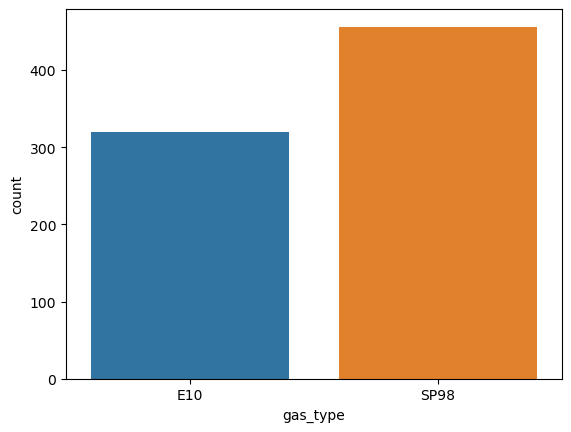

In [18]:
fig,ax = plt.subplots()
sns.countplot(x= data.gas_type)
plt.show()

#### The Graph shows more of the trips used SP98

In [19]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(object)

**Distribution of numerical columns**

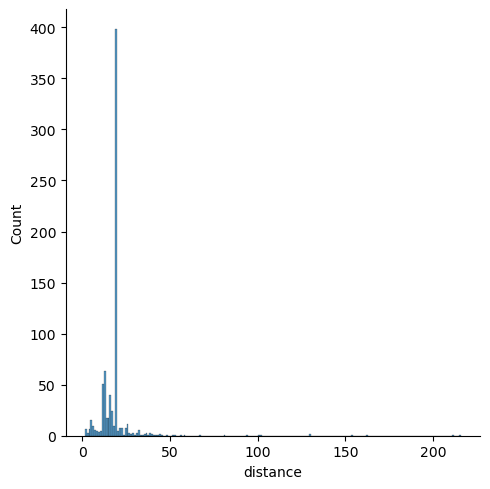

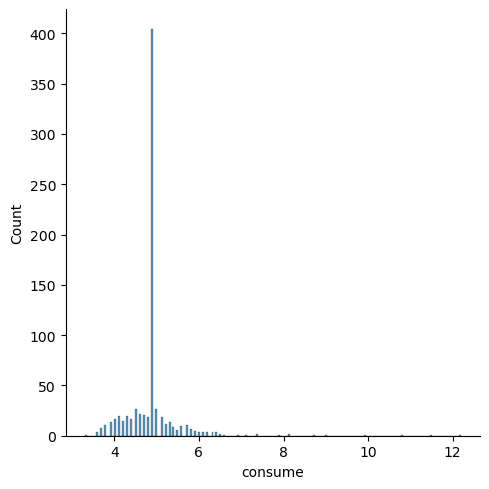

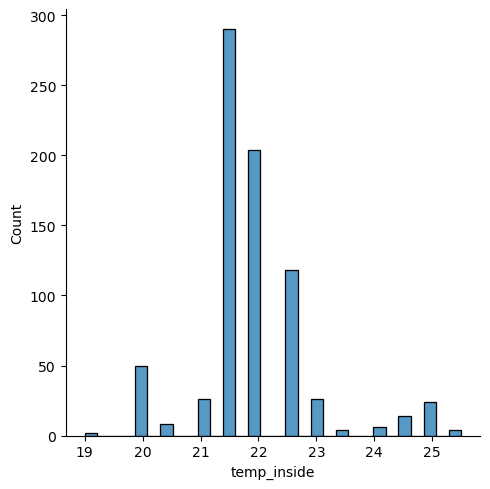

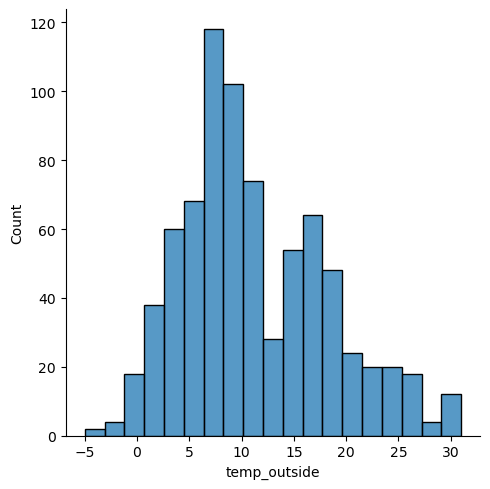

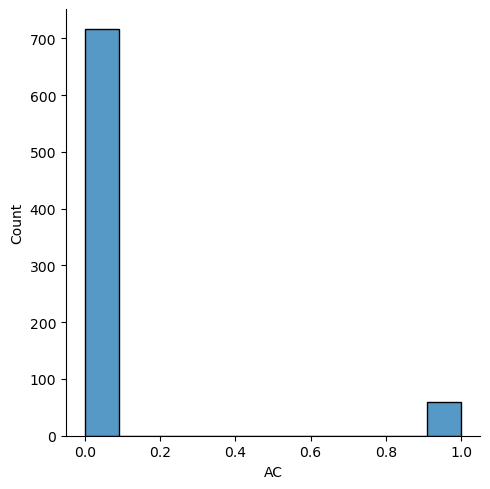

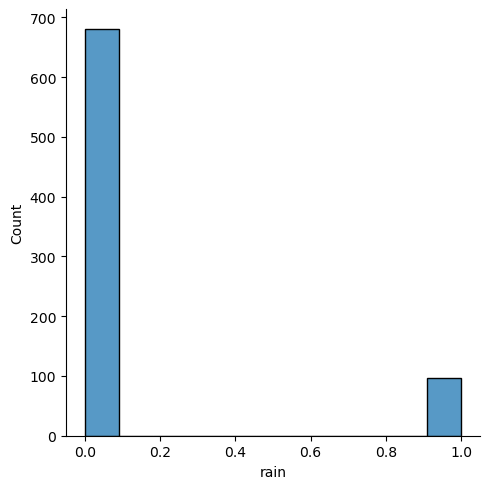

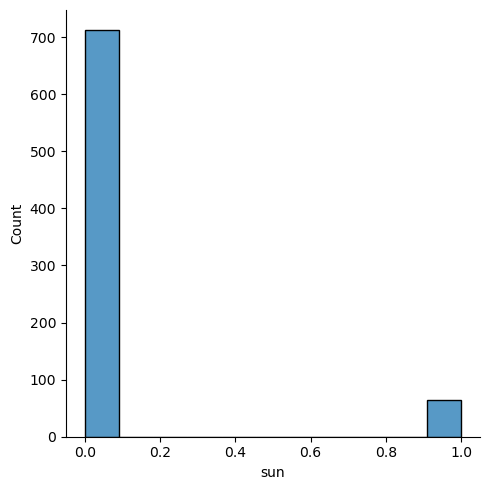

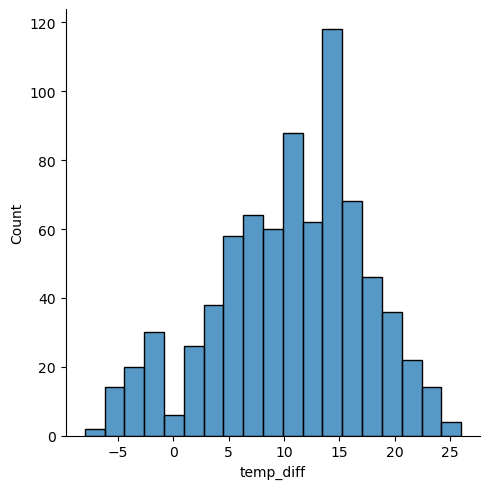

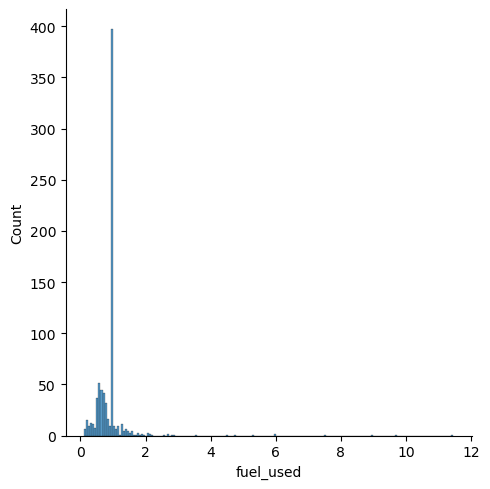

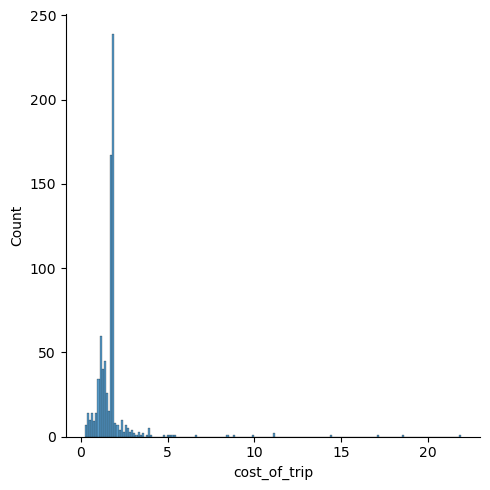

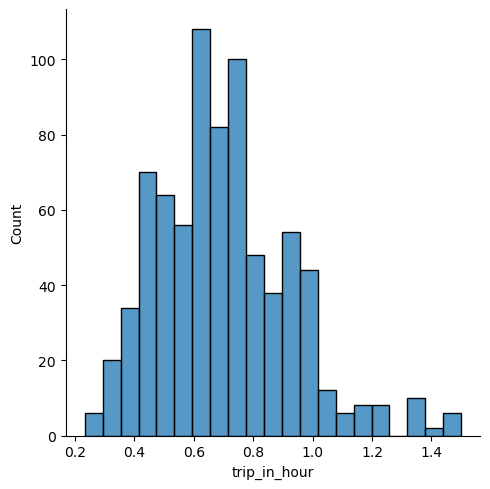

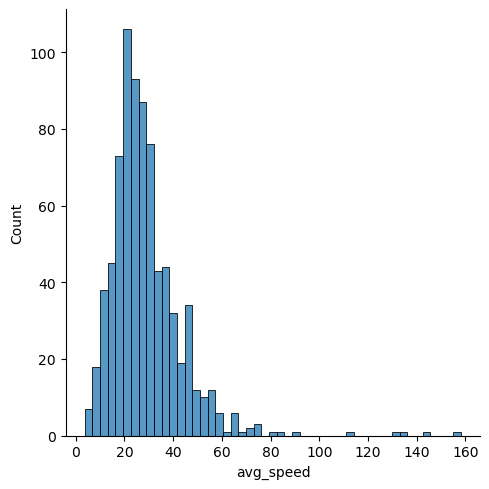

In [21]:
for column in numerical:
    sns.displot(numerical[column])
    plt.show()

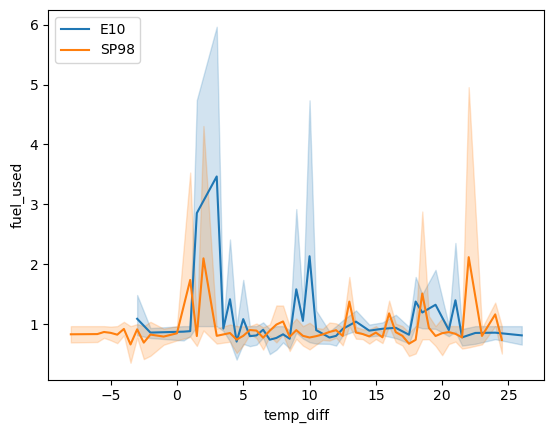

In [25]:
fig, ax = plt.subplots()
cole10 = data[data.gas_type == 'E10']
col98 = data[data.gas_type == 'SP98']

ax1 = sns.lineplot( data = cole10, x = cole10['temp_diff'], y= cole10['fuel_used'], label ='E10')
ax2 = sns.lineplot( data = col98, x = col98['temp_diff'], y= col98['fuel_used'], label ='SP98')
plt.legend(loc= 'upper left')
plt.show()

**The Above graph shows the Amount of fuel used depending on difference between temperature inside and outside**

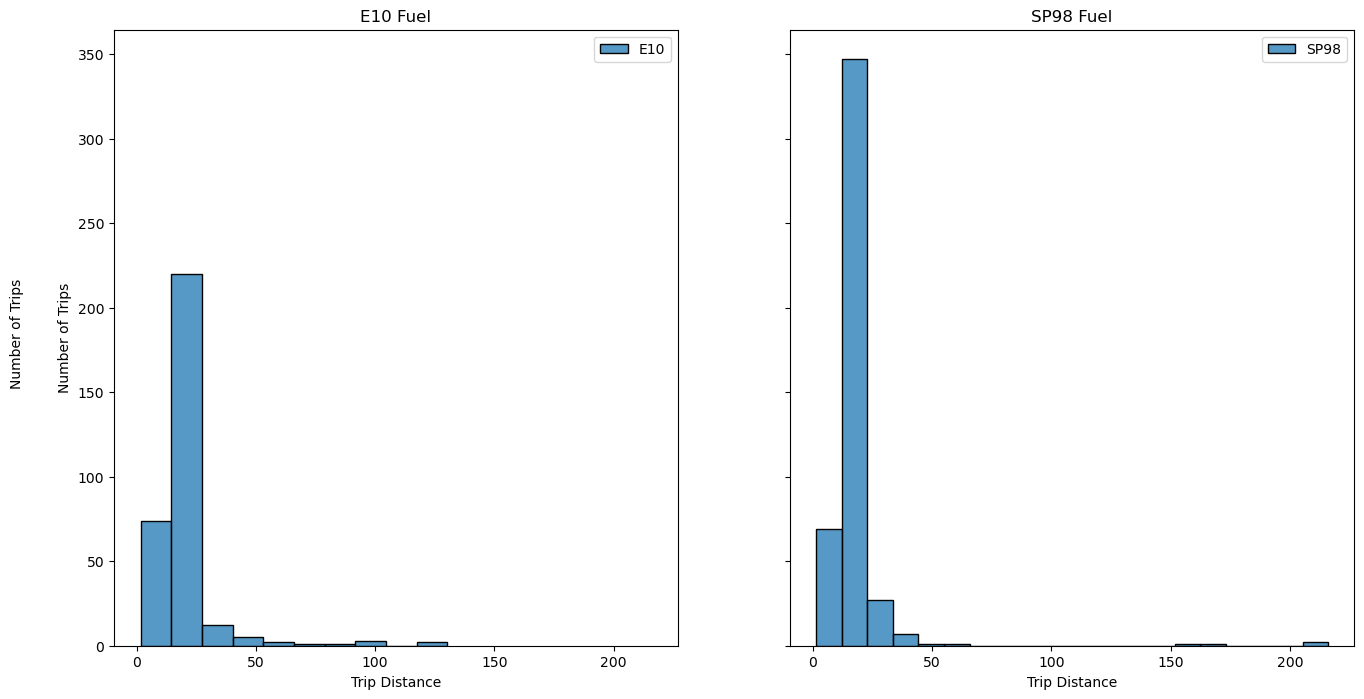

In [29]:
# Create a figure and subplots using plt.subplots()
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)

# Plot the histogram for 'E10' fuel on the first subplot (axes[0])
sns.histplot(ax=axes[0], data=cole10, x='distance', bins=10, label='E10')
axes[0].set(title='E10 Fuel', xlabel='Trip Distance', ylabel='Number of Trips')

# Plot the histogram for 'SP98' fuel on the second subplot (axes[1])
sns.histplot(ax=axes[1], data=col98, x='distance', bins=20, label='SP98')
axes[1].set(title='SP98 Fuel', xlabel='Trip Distance', ylabel='Number of Trips')

# Set the same y-axis label for both subplots
fig.text(0.06, 0.5, 'Number of Trips', va='center', rotation='vertical')

# Add legend for each subplot
axes[0].legend()
axes[1].legend()

plt.show()

**The Above graph shows number of trips at each distance. SP98 used for longer distance**

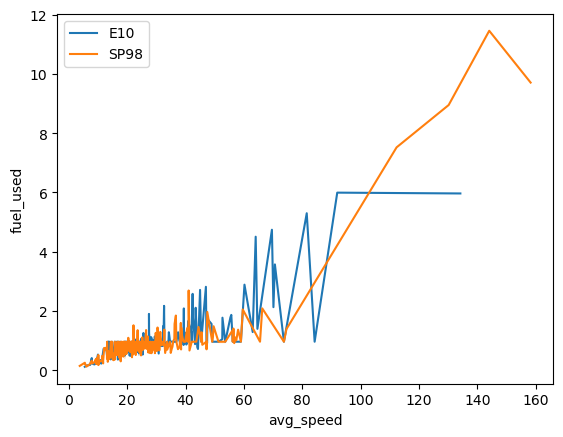

In [30]:
fig, ax = plt.subplots()
cole10 = data[data.gas_type == 'E10']
col98 = data[data.gas_type == 'SP98']

ax1 = sns.lineplot( data = cole10, x = cole10['avg_speed'], y= cole10['fuel_used'], label ='E10')
ax2 = sns.lineplot( data = col98, x = col98['avg_speed'], y= col98['fuel_used'], label ='SP98')
plt.legend(loc= 'upper left')
plt.show()

**The above graph shows fuel used based on average speed. The higher the average speed the more used of SP98.**

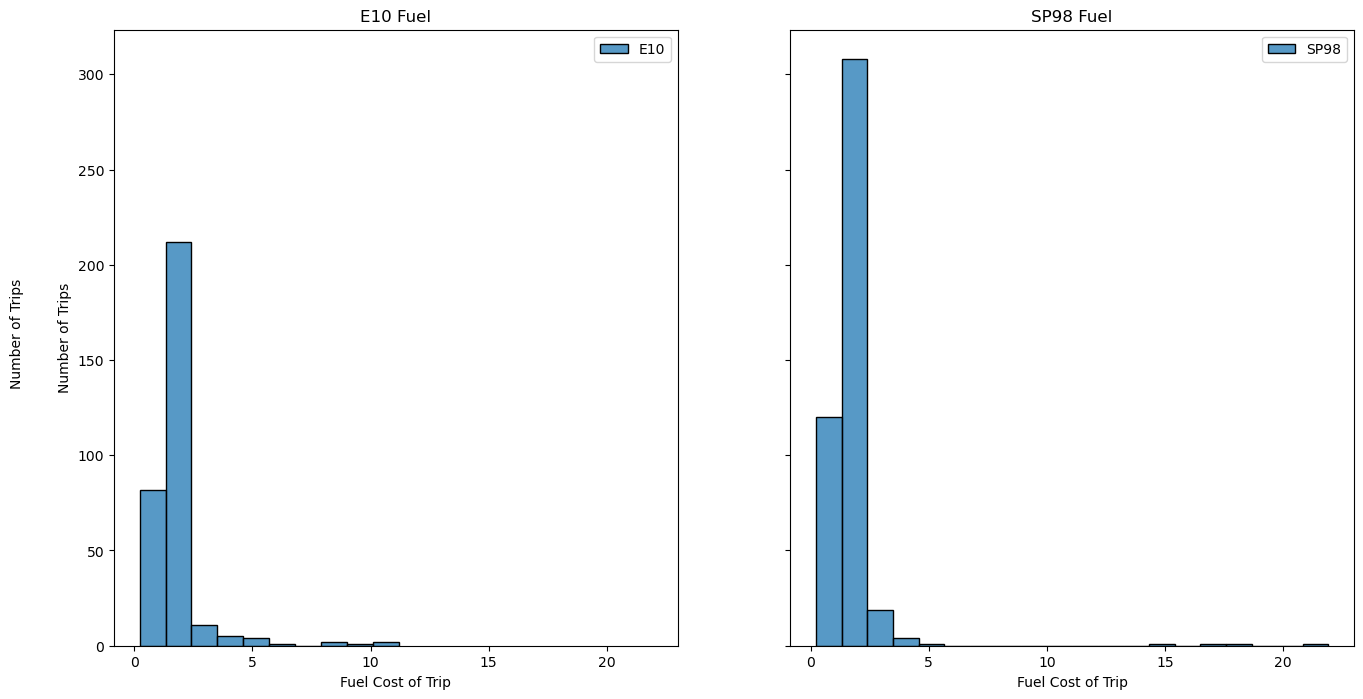

In [33]:
# Create a figure and subplots using plt.subplots()
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)

# Plot the histogram for 'E10' fuel on the first subplot (axes[0])
sns.histplot(ax=axes[0], data=cole10, x='cost_of_trip', bins=10, label='E10')
axes[0].set(title='E10 Fuel', xlabel='Fuel Cost of Trip', ylabel='Number of Trips')

# Plot the histogram for 'SP98' fuel on the second subplot (axes[1])
sns.histplot(ax=axes[1], data=col98, x='cost_of_trip', bins=20, label='SP98')
axes[1].set(title='SP98 Fuel', xlabel='Fuel Cost of Trip', ylabel='Number of Trips')

# Set the same y-axis label for both subplots
fig.text(0.06, 0.5, 'Number of Trips', va='center', rotation='vertical')

# Add legend for each subplot
axes[0].legend()
axes[1].legend()

plt.show()

**The above graph shows the distribution of cost of fuel per trip for each fuel type. SP98 has four highest trip cost.**

In [34]:
print(data['cost_of_trip'].min())
print(data['cost_of_trip'].max())


0.224
21.91


### Conclusion

* It appears when travelling with higher speed, for long distance, E10 sounds more economical.I would assign cars that use E10 when the speed is over 100kph.
* for the short trips, there is not much difference between the cost of each gas.
* Considering the temperature, if the difference between temp inside and outside is between 0 to 10 degree, it is better to use SP98 and if it is over 20 degree, it is recommended to use E10.

